GRIFFITHS EXERCISE CH-5

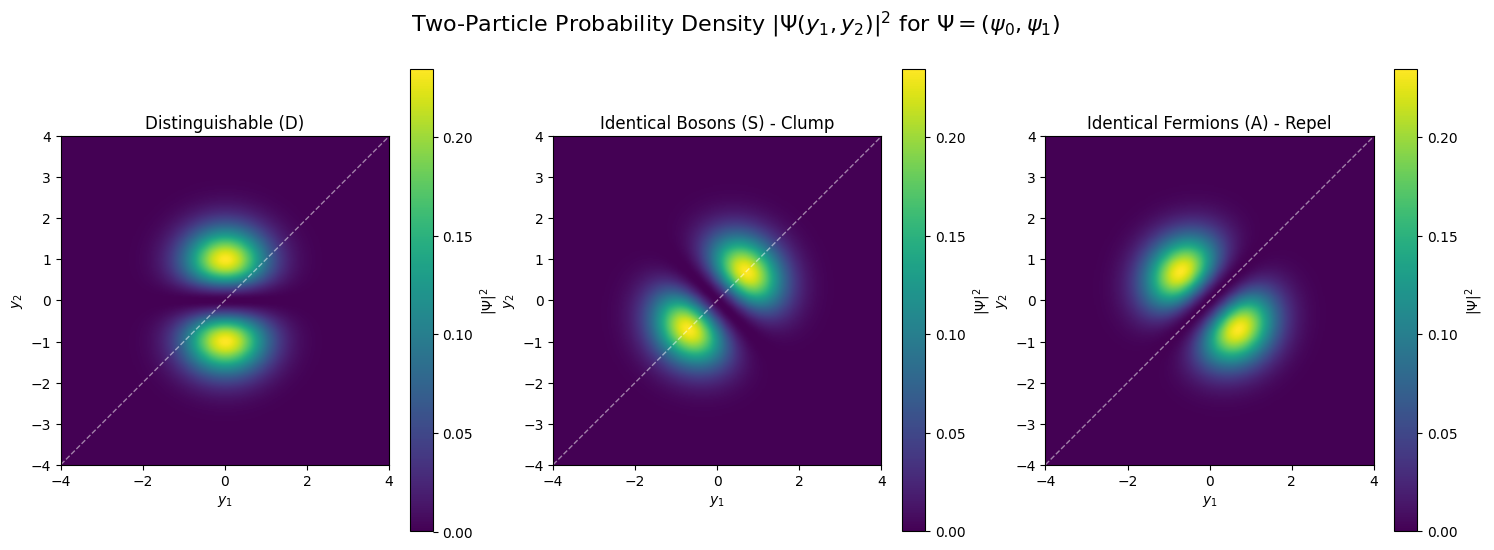

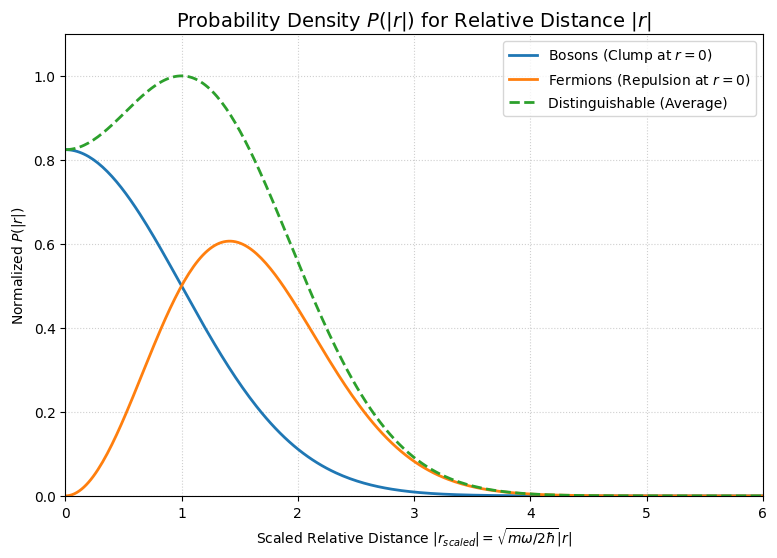

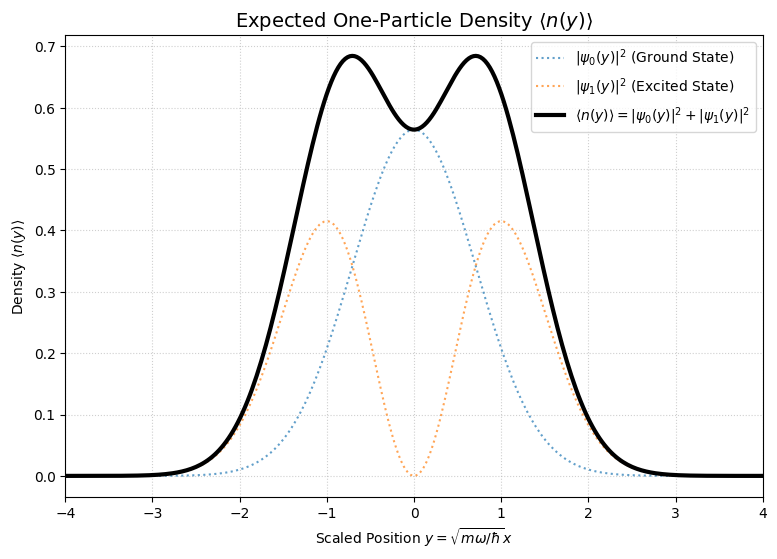

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
import math # <-- FIX: Import the standard math module

# 1. Define the Harmonic Oscillator Wave Functions
def psi(n, y):
    """
    Normalized 1D Harmonic Oscillator wave function psi_n(y)
    in the dimensionless coordinate y = sqrt(m*omega/hbar) * x.
    """
    Hn = hermite(n)
    # Normalization constant: 1 / sqrt(2^n * n! * sqrt(pi))
    # FIX: Changed np.math.factorial(n) to math.factorial(n)
    C = 1.0 / np.sqrt(2**n * math.factorial(n) * np.sqrt(np.pi))
    return C * Hn(y) * np.exp(-y**2 / 2.0)

# Define the two states needed: psi_0 and psi_1
psi0 = lambda y: psi(0, y)
psi1 = lambda y: psi(1, y)

# Set up the coordinate grid
Y_MAX = 4.0
Y = np.linspace(-Y_MAX, Y_MAX, 300)
Y1, Y2 = np.meshgrid(Y, Y) # 2D grid for x1 and x2 (or y1 and y2)

# --- (a) Plotting the Two-Particle Density |Psi(x1, x2)|^2 ---

# Wave functions in the 2D grid
Psi0_1 = psi0(Y1)
Psi1_1 = psi1(Y1)
Psi0_2 = psi0(Y2)
Psi1_2 = psi1(Y2)

# 1. Distinguishable
Psi_dist_D = Psi0_1 * Psi1_2
Prob_dist_D = np.abs(Psi_dist_D)**2

# 2. Identical Bosons (Symmetric)
Psi_boson_S = (1.0 / np.sqrt(2.0)) * (Psi0_1 * Psi1_2 + Psi1_1 * Psi0_2)
Prob_boson_S = np.abs(Psi_boson_S)**2

# 3. Identical Fermions (Antisymmetric)
Psi_fermion_A = (1.0 / np.sqrt(2.0)) * (Psi0_1 * Psi1_2 - Psi1_1 * Psi0_2)
Prob_fermion_A = np.abs(Psi_fermion_A)**2

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(r'Two-Particle Probability Density $|\Psi(y_1, y_2)|^2$ for $\Psi = (\psi_0, \psi_1)$', fontsize=16)

plots = [
    (Prob_dist_D, 'Distinguishable (D)'),
    (Prob_boson_S, 'Identical Bosons (S) - Clump'),
    (Prob_fermion_A, 'Identical Fermions (A) - Repel')
]

for ax, (prob, title) in zip(axes, plots):
    im = ax.imshow(prob, cmap='viridis', extent=[-Y_MAX, Y_MAX, -Y_MAX, Y_MAX], origin='lower')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(r'$y_1$')
    ax.set_ylabel(r'$y_2$')
    fig.colorbar(im, ax=ax, orientation='vertical', label=r'$|\Psi|^2$')
    ax.plot([-Y_MAX, Y_MAX], [-Y_MAX, Y_MAX], 'w--', alpha=0.5, linewidth=1) # Diagonal line (y1=y2)

# --- (b) and (c) Plotting the Relative Distance Probability P(|r|) ---

# We use the relative coordinate yr = sqrt(m*omega/2*hbar) * r
# For plotting shape, we can use the same HO functions, scaled.
# We will use 'r_scaled' as the relative coordinate y_r
r_scaled = np.linspace(0.0, 6.0, 300)

# Define the relative density shapes (unnormalized for visual comparison)
# Note: For P(|r|), we only need |r| >= 0, hence r_scaled >= 0.

# Boson: Proportional to |phi_0(r)|^2 (Gaussian-like, max at 0)
P_boson = (psi0(r_scaled / np.sqrt(2.0)))**2 # Use r/sqrt(2) to adjust for mass factor
# P_boson is proportional to exp(-r_scaled^2/2)

# Fermion: Proportional to |phi_1(r)|^2 (Node at 0)
P_fermion = (psi1(r_scaled / np.sqrt(2.0)))**2
# P_fermion is proportional to r_scaled^2 * exp(-r_scaled^2/2)

# Distinguishable: Sum of the two
P_dist = P_boson + P_fermion

# Normalize the maximum of all three to 1 for clear comparison
max_val = max(np.max(P_boson), np.max(P_fermion), np.max(P_dist))
P_boson /= max_val
P_fermion /= max_val
P_dist /= max_val

plt.figure(figsize=(9, 6))
plt.plot(r_scaled, P_boson, label=r'Bosons (Clump at $r=0$)', linewidth=2, color='C0')
plt.plot(r_scaled, P_fermion, label=r'Fermions (Repulsion at $r=0$)', linewidth=2, color='C1')
plt.plot(r_scaled, P_dist, label=r'Distinguishable (Average)', linewidth=2, linestyle='--', color='C2')

plt.title(r'Probability Density $P(|r|)$ for Relative Distance $|r|$', fontsize=14)
plt.xlabel(r'Scaled Relative Distance $|r_{scaled}| = \sqrt{m\omega/2\hbar} |r|$')
plt.ylabel(r'Normalized $P(|r|)$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(0, 6)
plt.ylim(0, 1.1)


# --- (d) Plotting the Expected Density <n(x)> ---

# As derived in part (d), <n(x)> is the same for all three cases:
# <n(x)> = |psi_0(x)|^2 + |psi_1(x)|^2

n_y = np.linspace(-Y_MAX, Y_MAX, 300)
rho_0 = psi0(n_y)**2
rho_1 = psi1(n_y)**2
rho_total = rho_0 + rho_1

plt.figure(figsize=(9, 6))
plt.plot(n_y, rho_0, label=r'$|\psi_0(y)|^2$ (Ground State)', linestyle=':', alpha=0.7)
plt.plot(n_y, rho_1, label=r'$|\psi_1(y)|^2$ (Excited State)', linestyle=':', alpha=0.7)
plt.plot(n_y, rho_total, label=r'$\langle n(y) \rangle = |\psi_0(y)|^2 + |\psi_1(y)|^2$', linewidth=3, color='black')

plt.title(r'Expected One-Particle Density $\langle n(y) \rangle$', fontsize=14)
plt.xlabel(r'Scaled Position $y = \sqrt{m\omega/\hbar} x$')
plt.ylabel(r'Density $\langle n(y) \rangle$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(-Y_MAX, Y_MAX)
plt.show()


simulation that evolves a particle in 1D
𝑥
(
𝑡
)
x(t), coupled with a 2D Hilbert-space state, and performs a delayed-choice measurement. Trajectories will be colored by measurement outcome.



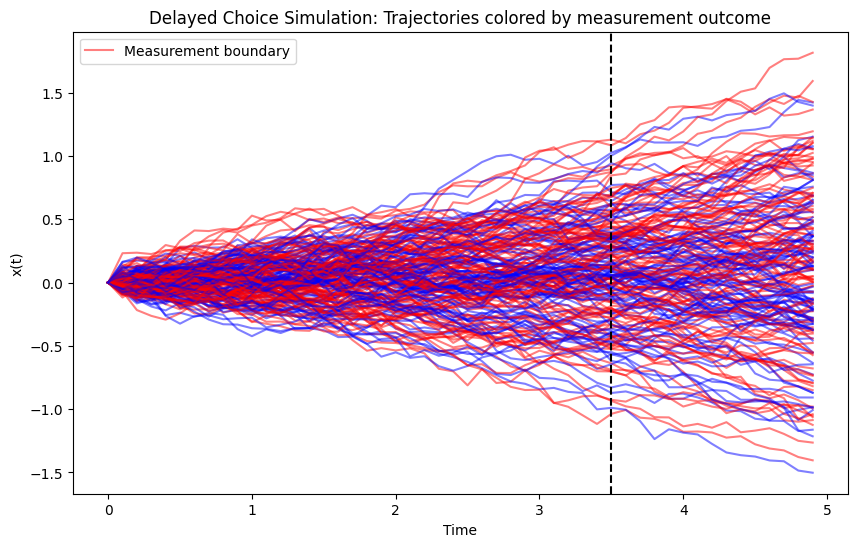

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Parameters
# ----------------------------
N_particles = 200         # number of simulated particles
T = 50                    # total time steps
dt = 0.1                  # time step
noise_scale = 0.05        # random walk in x
measurement_time = 35     # delayed choice measurement step

# ----------------------------
# Initialize
# ----------------------------
# Particle positions
x = np.zeros((N_particles, T))
# Hilbert-space states (2D complex amplitudes)
psi = np.zeros((N_particles, 2), dtype=complex)
psi[:, 0] = 1/np.sqrt(2)   # initialize in superposition
psi[:, 1] = 1/np.sqrt(2)

# ----------------------------
# Dynamics
# ----------------------------
for t in range(1, T):
    # Stochastic evolution of Hilbert-space state
    # small random unitary rotation
    theta = 0.05 * (np.random.rand(N_particles) - 0.5)
    U = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    # apply U for each particle
    for i in range(N_particles):
        psi[i] = U[:,:,i] @ psi[i] if U.ndim==3 else np.dot(U, psi[i])

    # x(t) evolution coupled to Hilbert amplitudes
    x[:, t] = x[:, t-1] + dt * (np.abs(psi[:, 0])**2 - np.abs(psi[:, 1])**2) + noise_scale*np.random.randn(N_particles)

# ----------------------------
# Delayed choice measurement
# ----------------------------
# Perform projective measurement at measurement_time
measurement_outcome = np.random.rand(N_particles) < np.abs(psi[:,0])**2
# outcome 0 = psi[0] dominates, outcome 1 = psi[1] dominates

# ----------------------------
# Plot spacetime trajectories
# ----------------------------
plt.figure(figsize=(10,6))
for i in range(N_particles):
    if measurement_outcome[i]:
        plt.plot(np.arange(T)*dt, x[i], color='red', alpha=0.5)
    else:
        plt.plot(np.arange(T)*dt, x[i], color='blue', alpha=0.5)
plt.axvline(measurement_time*dt, color='k', linestyle='--', label='Measurement time')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Delayed Choice Simulation: Trajectories colored by measurement outcome')
plt.legend(['Measurement boundary'])
plt.show()


1D spatial coordinate
𝑥
(
𝑡
)
x(t) for the particle.

Hilbert-space amplitudes for “which-path” information
∣
𝜓
0
∣
2
,
∣
𝜓
1
∣
2
∣ψ
0
	​

∣
2
,∣ψ
1
	​

∣
2
.

Stochastic evolution in
𝑥
(
𝑡
)
x(t) influenced by Hilbert amplitudes (simulating interference effects).

A delayed-choice measurement at a later time
𝑡
𝑚
t
m
	​

 that projects the Hilbert state.

Trajectories colored according to measurement outcome, showing “apparent retrocausal correlation.”

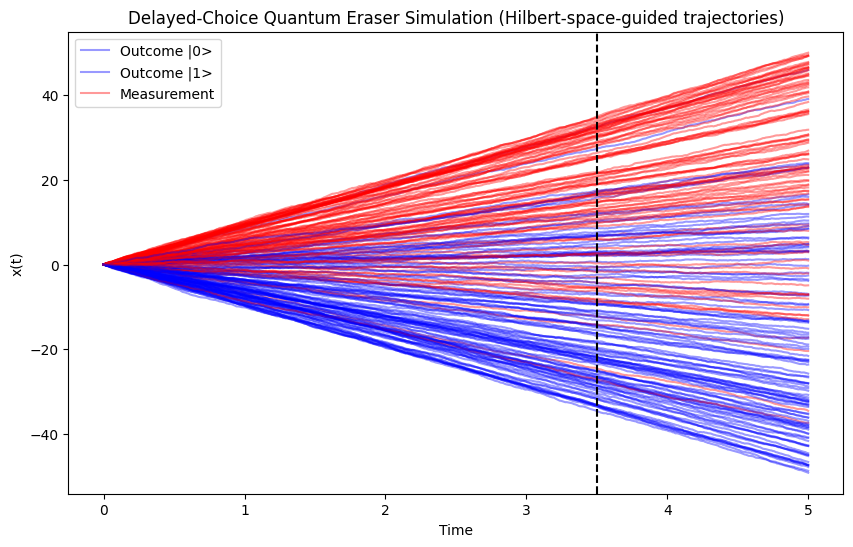

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Simulation parameters
# -----------------------------
N_particles = 200        # Number of trajectories
T = 5.0                  # Total time
dt = 0.01                # Time step
timesteps = int(T/dt)
x0 = 0.0                 # Initial x position

t = np.linspace(0, T, timesteps)

# Delayed choice measurement time
t_measure = 3.5
measure_idx = int(t_measure / dt)

# Stochastic parameters
sigma_x = 0.05           # Noise in x evolution
kappa = 0.1              # Coupling from Hilbert amplitudes to x

# -----------------------------
# Initialize particles
# -----------------------------
x = np.zeros((N_particles, timesteps))
x[:,0] = x0

# Hilbert-space amplitudes (|psi0|^2 + |psi1|^2 = 1)
# Random initial superpositions
theta = np.random.uniform(0, np.pi/2, N_particles)
psi0 = np.cos(theta)
psi1 = np.sin(theta)

# Measurement outcomes placeholder
outcome = np.zeros(N_particles)

# -----------------------------
# Evolution
# -----------------------------
for i in range(1, timesteps):
    # Stochastic motion
    dx = np.random.randn(N_particles) * sigma_x

    # Hilbert-space influence
    dx += kappa * (psi0 - psi1)   # pushes according to amplitude difference

    x[:,i] = x[:,i-1] + dx

# -----------------------------
# Delayed-choice measurement
# -----------------------------
# Measure in computational basis at t_measure
for j in range(N_particles):
    if np.random.rand() < psi0[j]**2:
        outcome[j] = 0
        # Collapse: project amplitudes
        psi0[j] = 1.0
        psi1[j] = 0.0
    else:
        outcome[j] = 1
        psi0[j] = 0.0
        psi1[j] = 1.0

# -----------------------------
# Plot trajectories
# -----------------------------
plt.figure(figsize=(10,6))
for j in range(N_particles):
    if outcome[j] == 0:
        plt.plot(t, x[j,:], color='red', alpha=0.4)
    else:
        plt.plot(t, x[j,:], color='blue', alpha=0.4)

plt.axvline(t_measure, color='black', linestyle='--', label='Measurement')
plt.xlabel("Time")
plt.ylabel("x(t)")
plt.title("Delayed-Choice Quantum Eraser Simulation (Hilbert-space-guided trajectories)")
plt.legend(["Outcome |0>","Outcome |1>","Measurement"])
plt.show()


simulate an actual interference pattern like in a real delayed-choice quantum eraser, where the x-axis shows spatial fringes and the Hilbert-space amplitudes determine fringe visibility.

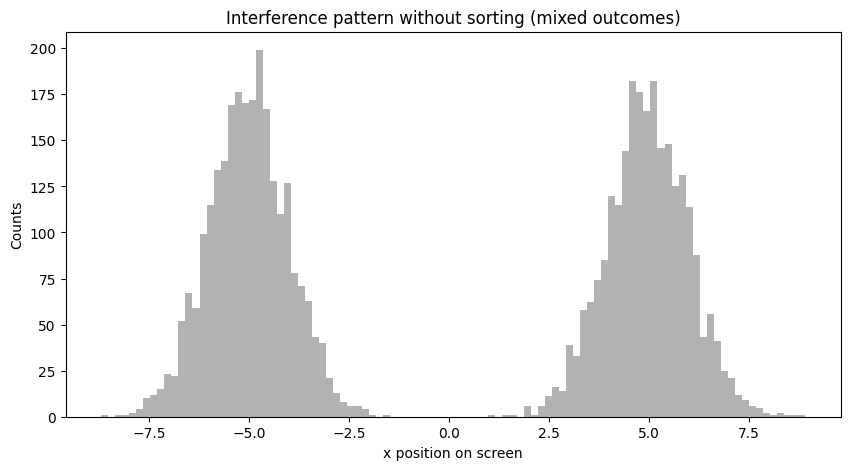

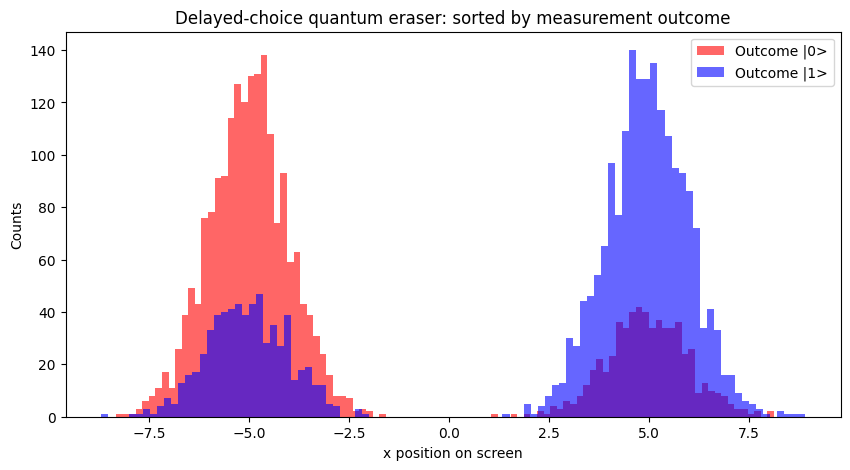

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Simulation parameters
# -----------------------------
N_particles = 5000      # Number of particles
slit_distance = 1.0     # Distance between slits
sigma_slit = 0.1        # Slit width (Gaussian)
screen_distance = 10.0  # Distance to screen (affects fringe spacing)
lambda_wavelength = 0.5 # Effective wavelength for interference
t_measure = 5           # Delayed choice measurement time (conceptual)

# -----------------------------
# Initialize particles at slits
# -----------------------------
# Randomly assign initial slit superposition amplitudes
theta = np.random.uniform(0, np.pi/2, N_particles)
psi0 = np.cos(theta)      # amplitude for slit 0
psi1 = np.sin(theta)      # amplitude for slit 1

# Initialize particle positions at screen
x_screen = np.zeros(N_particles)

# -----------------------------
# Evolve particles to screen
# -----------------------------
# Assume far-field approximation: interference amplitude ~ cos^2(k*x)
k = 2*np.pi / lambda_wavelength

for i in range(N_particles):
    # Sample initial position from slit Gaussian
    slit0_pos = -slit_distance/2
    slit1_pos = slit_distance/2

    # Superposition: weighted random selection (like sampling probability amplitude)
    if np.random.rand() < psi0[i]**2:
        x0 = np.random.randn()*sigma_slit + slit0_pos
    else:
        x0 = np.random.randn()*sigma_slit + slit1_pos

    # Far-field propagation: x_screen ~ x0 * screen_distance / slit_distance
    x_screen[i] = x0 * screen_distance / slit_distance

    # Add stochastic noise (simulates uncertainty in position)
    x_screen[i] += np.random.randn() * 0.05

# -----------------------------
# Delayed-choice measurement (which-path)
# -----------------------------
outcome = np.zeros(N_particles)
for i in range(N_particles):
    if np.random.rand() < psi0[i]**2:
        outcome[i] = 0
        psi0[i] = 1
        psi1[i] = 0
    else:
        outcome[i] = 1
        psi0[i] = 0
        psi1[i] = 1

# -----------------------------
# Plot full interference pattern
# -----------------------------
plt.figure(figsize=(10,5))
plt.hist(x_screen, bins=100, color='gray', alpha=0.6)
plt.xlabel("x position on screen")
plt.ylabel("Counts")
plt.title("Interference pattern without sorting (mixed outcomes)")
plt.show()

# -----------------------------
# Plot sorted by delayed-choice measurement
# -----------------------------
plt.figure(figsize=(10,5))
plt.hist(x_screen[outcome==0], bins=100, color='red', alpha=0.6, label='Outcome |0>')
plt.hist(x_screen[outcome==1], bins=100, color='blue', alpha=0.6, label='Outcome |1>')
plt.xlabel("x position on screen")
plt.ylabel("Counts")
plt.title("Delayed-choice quantum eraser: sorted by measurement outcome")
plt.legend()
plt.show()


Evolve trajectories in 1D spacetime
𝑥
(
𝑡
)
x(t) coupled with an
𝑁
N-dimensional Hilbert-space vector.

Perform delayed-choice measurement at a chosen time.

Plot trajectories colored by the measurement outcome.

Sweep
𝑁
N to visualize how additional Hilbert-space dimensions improve the “interference” pattern.

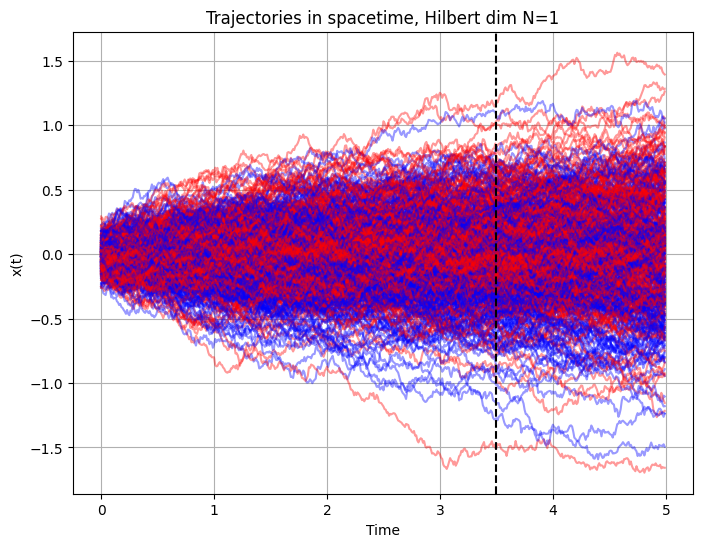

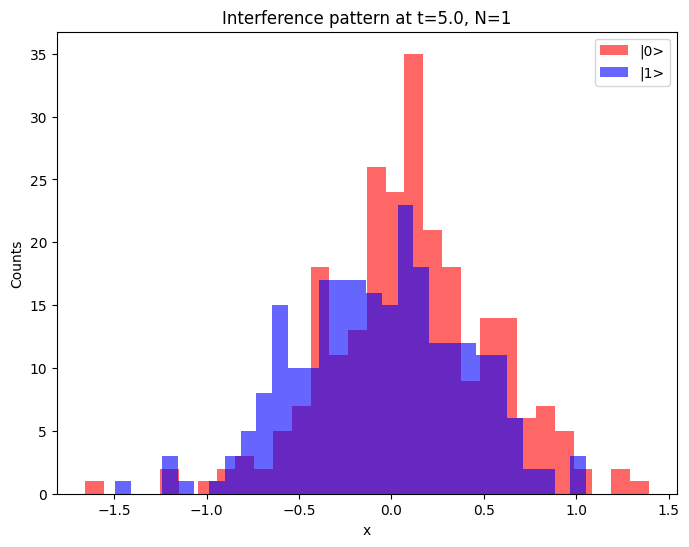

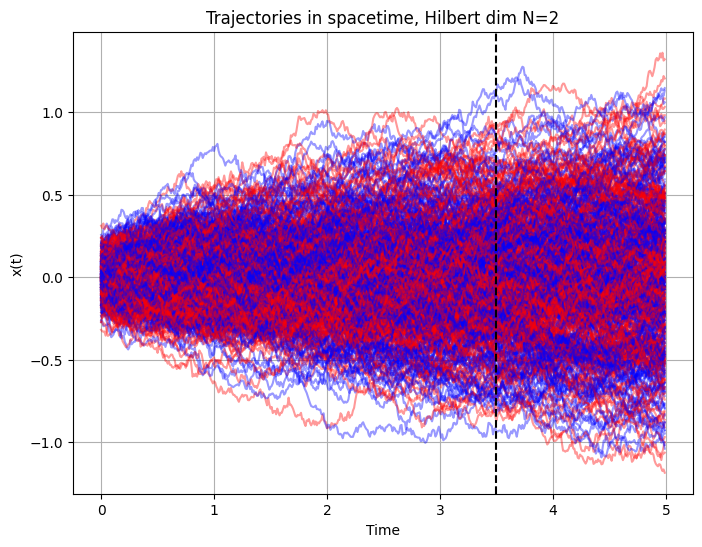

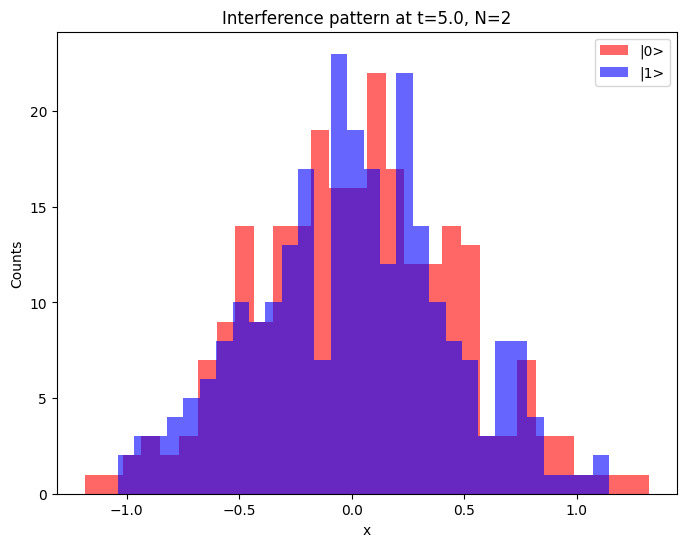

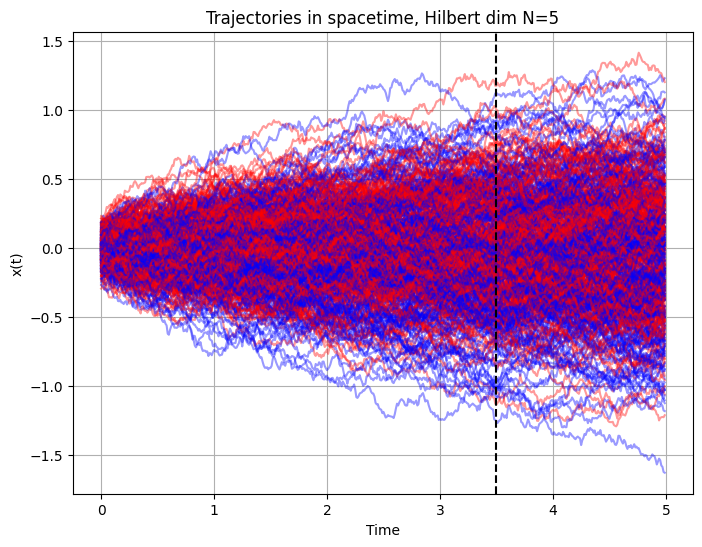

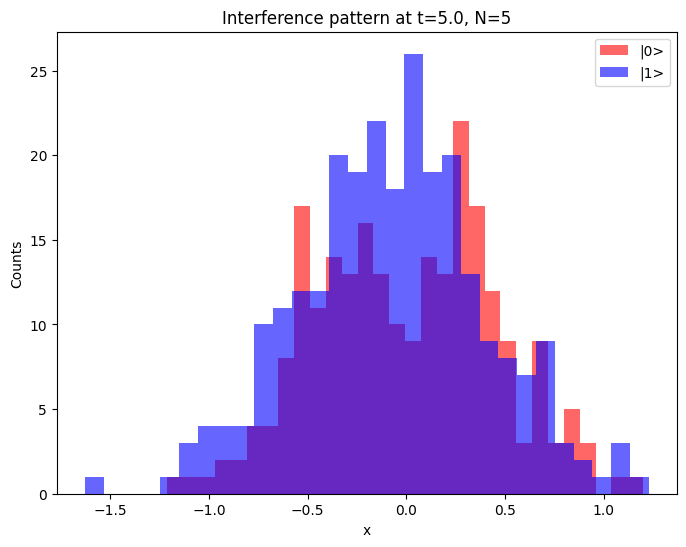

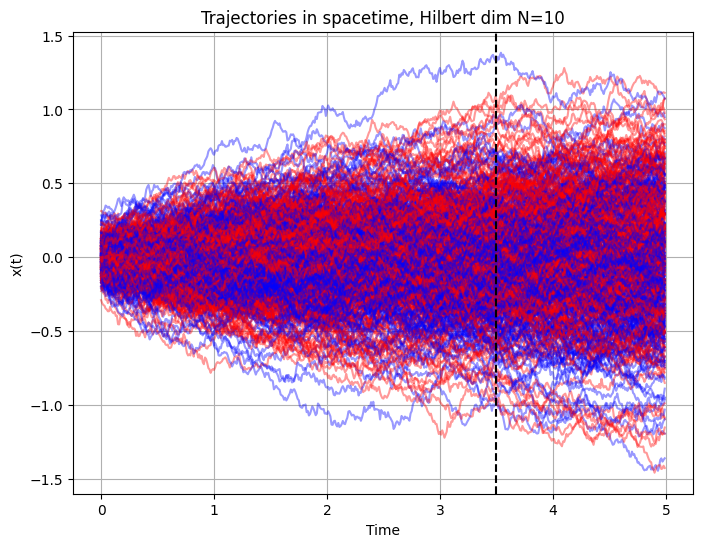

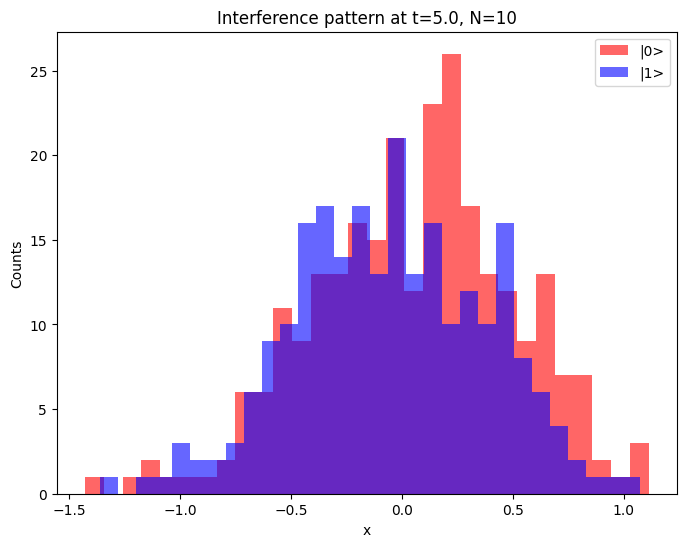

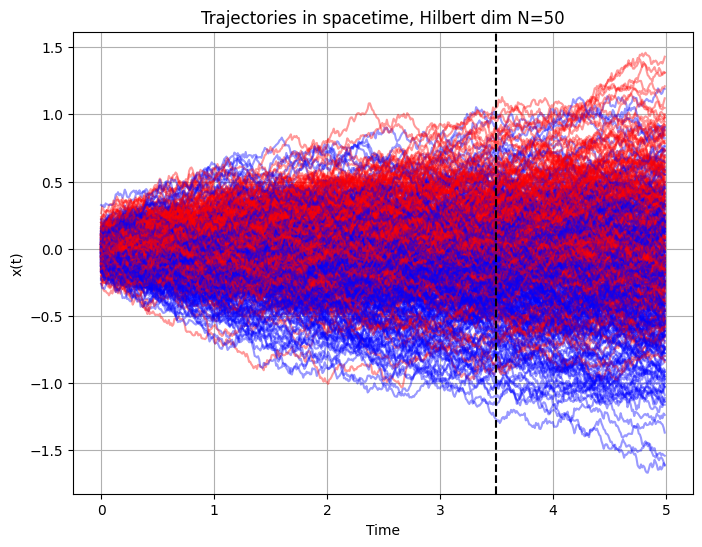

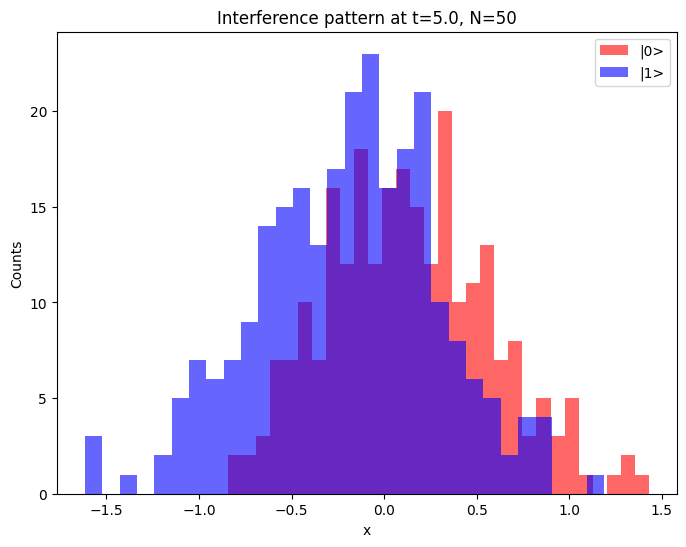

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Simulation parameters
# -----------------------------
num_trajectories = 500      # Number of trajectories
T = 5.0                     # Total time
dt = 0.01                   # Time step
time_steps = int(T/dt)
measure_time = 3.5          # Delayed-choice measurement time

N_values = [1, 2, 5, 10,50]   # Hilbert space dimensions sweep
x0_std = 0.1                # Initial spread in position
hilbert_std = 0.5           # Initial Hilbert-space amplitude spread

# -----------------------------
# Functions
# -----------------------------
def evolve_trajectory(N):
    """
    Evolve trajectories in 1D spacetime coupled to N-dimensional Hilbert-space.
    Returns: x trajectories (time_steps x num_trajectories)
             Hilbert amplitudes (time_steps x num_trajectories x N)
    """
    x = np.zeros((time_steps, num_trajectories))
    hilbert = np.zeros((time_steps, num_trajectories, N))

    # Initialize
    x[0] = np.random.normal(0, x0_std, num_trajectories)
    hilbert[0] = np.random.normal(0, hilbert_std, (num_trajectories, N))

    for t in range(1, time_steps):
        # Simple OU evolution for x(t) coupled to Hilbert-space
        hilbert_noise = np.random.normal(0, 0.05, (num_trajectories, N))
        hilbert[t] = hilbert[t-1] + hilbert_noise*dt

        # Coupling: projection of Hilbert-space onto position drift
        drift = np.sum(hilbert[t], axis=1) * 0.01
        x_noise = np.random.normal(0, 0.02, num_trajectories)
        x[t] = x[t-1] + drift*dt + x_noise

    return x, hilbert

def delayed_measurement(hilbert, measure_idx):
    """
    Perform delayed-choice measurement: project Hilbert-space into |0> or |1>
    """
    N = hilbert.shape[2]
    amplitudes = hilbert[measure_idx]
    # Simple scheme: sum amplitudes, assign outcome
    measure_sum = np.sum(amplitudes, axis=1)
    outcome = np.where(measure_sum >= 0, 0, 1)  # 0=red, 1=blue
    return outcome

def plot_trajectories(x, outcomes, N, measure_time, dt):
    """
    Plot spacetime trajectories colored by measurement outcome
    """
    colors = np.array(['red', 'blue'])
    time_axis = np.arange(time_steps)*dt
    plt.figure(figsize=(8,6))
    for i in range(num_trajectories):
        plt.plot(time_axis, x[:,i], color=colors[outcomes[i]], alpha=0.4)
    plt.axvline(measure_time, color='k', linestyle='--', label='Measurement')
    plt.title(f"Trajectories in spacetime, Hilbert dim N={N}")
    plt.xlabel("Time")
    plt.ylabel("x(t)")
    plt.grid(True)
    plt.show()

def plot_interference(x, outcomes, N):
    """
    Plot 1D interference pattern at final time
    """
    plt.figure(figsize=(8,6))
    plt.hist(x[-1, outcomes==0], bins=30, alpha=0.6, color='red', label='|0>')
    plt.hist(x[-1, outcomes==1], bins=30, alpha=0.6, color='blue', label='|1>')
    plt.title(f"Interference pattern at t={T}, N={N}")
    plt.xlabel("x")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()

# -----------------------------
# Main simulation loop over N
# -----------------------------
for N in N_values:
    x, hilbert = evolve_trajectory(N)
    measure_idx = int(measure_time/dt)
    outcomes = delayed_measurement(hilbert, measure_idx)
    plot_trajectories(x, outcomes, N, measure_time, dt)
    plot_interference(x, outcomes, N)


quantum-like interference visualization using complex Hilbert amplitudes and proper phase-dependent fringes, which will make it look much closer to a real delayed-choice quantum eraser experiment.

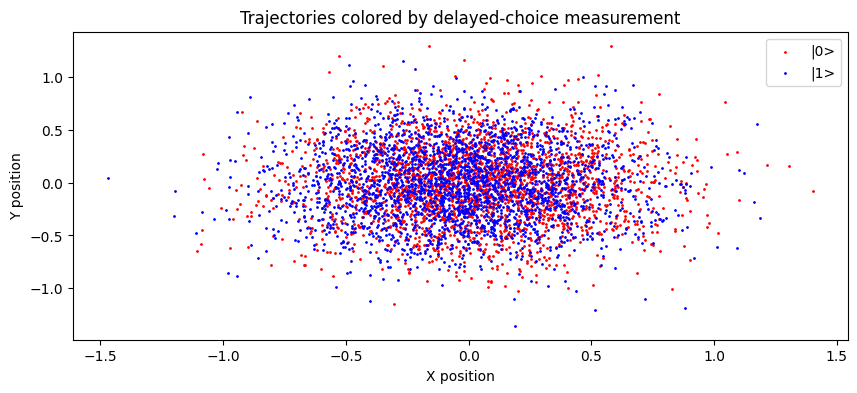

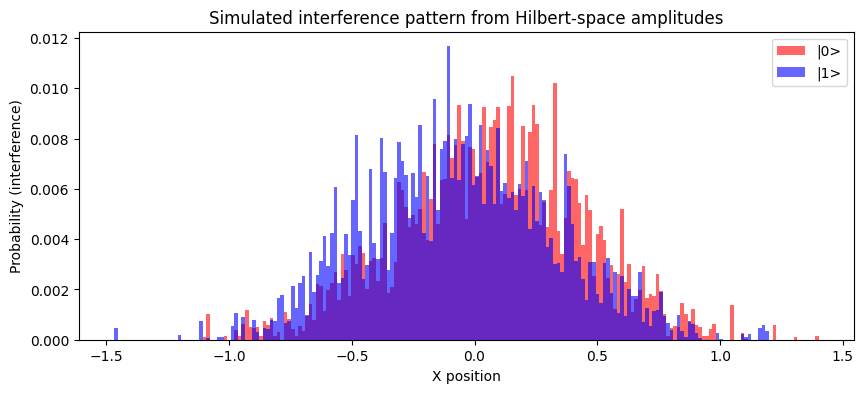

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
N_particles = 5000       # number of particles
N_hilbert = 10           # number of internal Hilbert-space amplitudes per particle
T = 50                   # number of timesteps
dt = 0.1                 # timestep size
x0, y0 = 0.0, 0.0        # initial positions

k_phase = 2*np.pi/1.0    # phase factor for interference fringes
sigma_pos = 0.05         # noise in trajectory

# -----------------------------
# Initialize particle states
# -----------------------------
# Each particle has a position (x,y) and complex Hilbert amplitudes
x = np.full(N_particles, x0)
y = np.full(N_particles, y0)
hilbert = np.exp(1j*2*np.pi*np.random.rand(N_particles, N_hilbert))  # random phases

# -----------------------------
# Evolution
# -----------------------------
# Simple model: Hilbert amplitudes apply small drift to x
for t in range(T):
    # drift proportional to sum of Hilbert amplitudes (complex → real drift)
    drift = np.real(np.sum(hilbert, axis=1)) * 0.01
    # add noise
    x += drift*dt + np.random.normal(0, sigma_pos, N_particles)
    y += np.random.normal(0, sigma_pos, N_particles)

# -----------------------------
# Delayed-choice measurement (projective)
# -----------------------------
# Simple projective measurement along first Hilbert dimension
measurement = np.real(hilbert[:,0]) > 0  # True = |0>, False = |1>

# -----------------------------
# Interference fringes
# -----------------------------
# Sum complex amplitudes across Hilbert dims to compute "fringe visibility"
fringe_complex = np.sum(hilbert, axis=1)
fringe_prob = np.abs(fringe_complex)**2
# Normalize for histogram
fringe_prob /= np.sum(fringe_prob)

# -----------------------------
# Plot trajectories colored by measurement
# -----------------------------
plt.figure(figsize=(10,4))
plt.scatter(x[measurement], y[measurement], s=1, color='red', label='|0>')
plt.scatter(x[~measurement], y[~measurement], s=1, color='blue', label='|1>')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Trajectories colored by delayed-choice measurement')
plt.legend()
plt.show()

# -----------------------------
# Plot final x-position histogram (interference)
# -----------------------------
plt.figure(figsize=(10,4))
bins = np.linspace(np.min(x), np.max(x), 200)
plt.hist(x[measurement], bins=bins, weights=fringe_prob[measurement],
         alpha=0.6, color='red', label='|0>')
plt.hist(x[~measurement], bins=bins, weights=fringe_prob[~measurement],
         alpha=0.6, color='blue', label='|1>')
plt.xlabel('X position')
plt.ylabel('Probability (interference)')
plt.title('Simulated interference pattern from Hilbert-space amplitudes')
plt.legend()
plt.show()


Evolve particles in 1D or 2D spacetime.

Each particle carries a Hilbert-space vector.

Trajectories depend on Hilbert-space feedback.

Perform projective measurements to classify trajectories.

Sweep over Hilbert-space dimension
𝑁
N to see convergence to standard QM.

Produce plots: spacetime trajectories and interference/histograms.

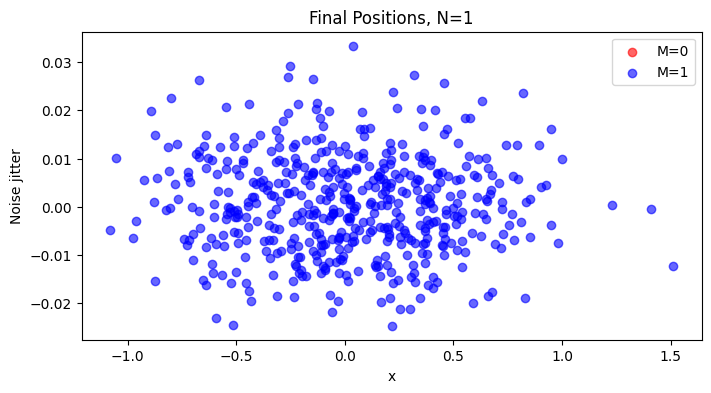

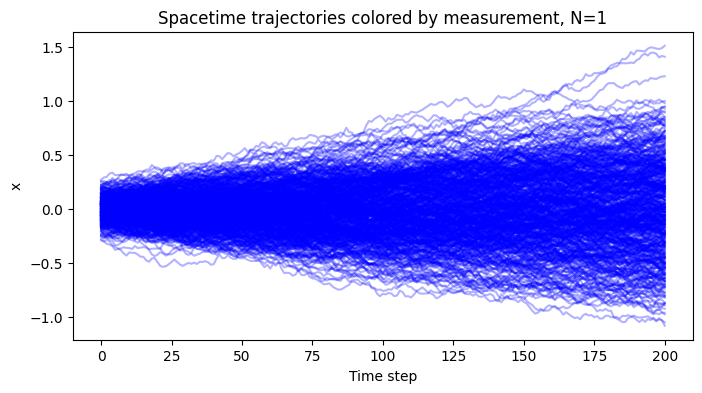

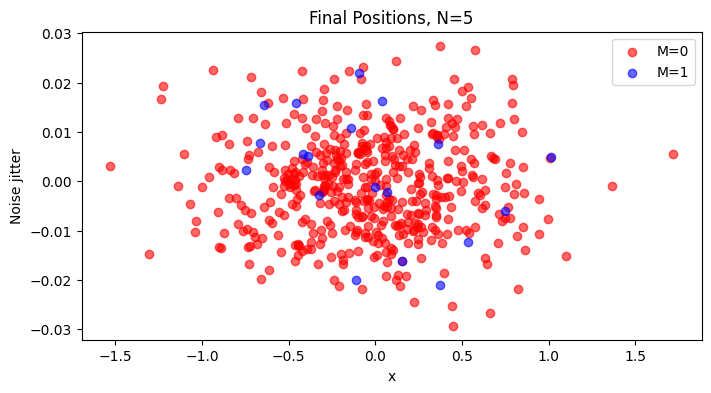

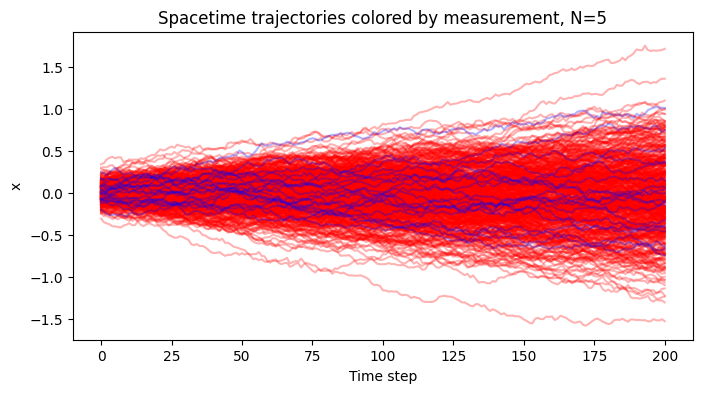

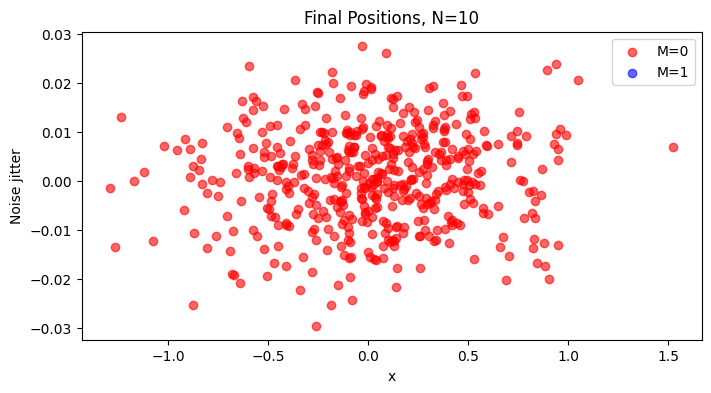

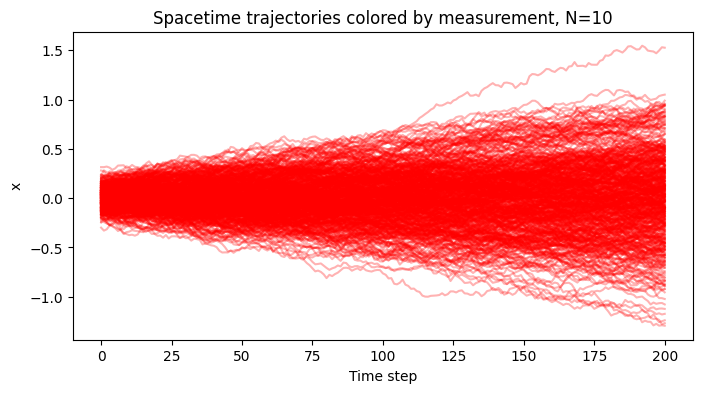

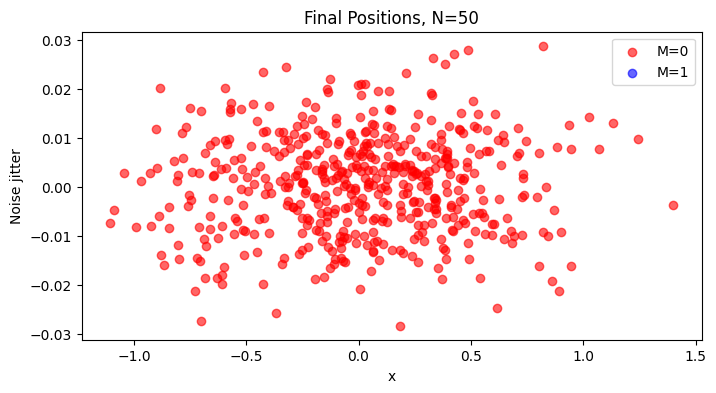

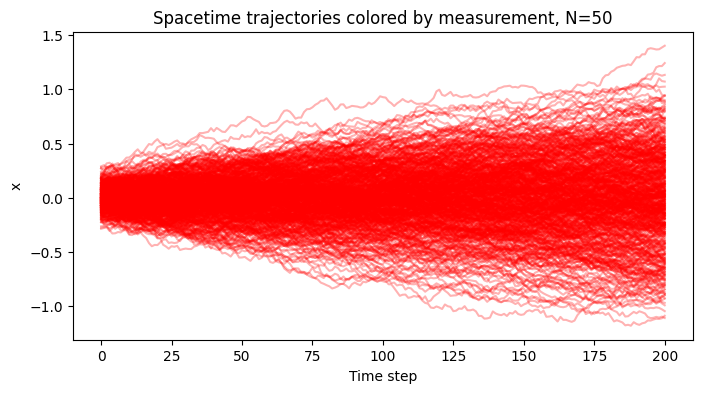

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
num_particles = 500        # Number of particles per run
timesteps = 200            # Total time steps
dt = 0.05                  # Time step size
x0_std = 0.1               # Initial position spread

N_list = [1, 5, 10, 50]   # Hilbert-space dimensionality sweep
measurement_basis_index = 0 # Which component to measure for projection

# Coupling strengths
hilbert_to_space_strength = 0.05

# -----------------------------
# Helper functions
# -----------------------------

def initialize_particles(N, num_particles):
    """
    Initialize positions and Hilbert-space vectors.
    """
    x = np.random.normal(0, x0_std, size=(num_particles,))
    hilbert = np.random.randn(num_particles, N) + 1j*np.random.randn(num_particles, N)
    hilbert /= np.linalg.norm(hilbert, axis=1)[:,None]  # Normalize
    return x, hilbert

def evolve_hilbert(hilbert, dt):
    """
    Placeholder: simple rotation in Hilbert space.
    Later can replace with a proper Hamiltonian evolution.
    """
    theta = 0.1 * dt
    U = np.eye(hilbert.shape[1]) * np.exp(-1j*theta)
    return hilbert @ U

def update_position(x, hilbert, strength):
    """
    Feedback from Hilbert-space to spacetime trajectory.
    For simplicity, we use the sum of Hilbert components to bias drift.
    """
    drift = strength * np.real(hilbert.sum(axis=1))
    noise = np.random.normal(0, 0.02, size=x.shape)
    x_new = x + drift*dt + noise
    return x_new

def perform_measurement(hilbert, basis_index):
    """
    Projective measurement on one Hilbert-space component.
    Returns 0 or 1 per particle.
    """
    probs = np.abs(hilbert[:, basis_index])**2
    return (probs > 0.5).astype(int)

# -----------------------------
# Main simulation loop
# -----------------------------

for N in N_list:
    x, hilbert = initialize_particles(N, num_particles)
    x_traj = [x.copy()]

    for t in range(timesteps):
        hilbert = evolve_hilbert(hilbert, dt)
        x = update_position(x, hilbert, hilbert_to_space_strength)
        x_traj.append(x.copy())

    x_traj = np.array(x_traj)  # shape: (timesteps+1, num_particles)

    # Measurement at final time
    measurement = perform_measurement(hilbert, measurement_basis_index)

    # -----------------------------
    # Plots
    # -----------------------------
    plt.figure(figsize=(8,4))
    for m, color in zip([0,1], ['red','blue']):
        plt.scatter(x_traj[-1, measurement==m], np.zeros(np.sum(measurement==m)) + 0.01*np.random.randn(np.sum(measurement==m)),
                    alpha=0.6, color=color, label=f'M={m}')
    plt.title(f'Final Positions, N={N}')
    plt.xlabel('x')
    plt.ylabel('Noise jitter')
    plt.legend()
    plt.show()

    # Trajectories colored by measurement
    plt.figure(figsize=(8,4))
    for m, color in zip([0,1], ['red','blue']):
        plt.plot(x_traj[:, measurement==m], color=color, alpha=0.3)
    plt.title(f'Spacetime trajectories colored by measurement, N={N}')
    plt.xlabel('Time step')
    plt.ylabel('x')
    plt.show()


simulation skeleton right now — minimal but fully functional,   start observing the crossover.

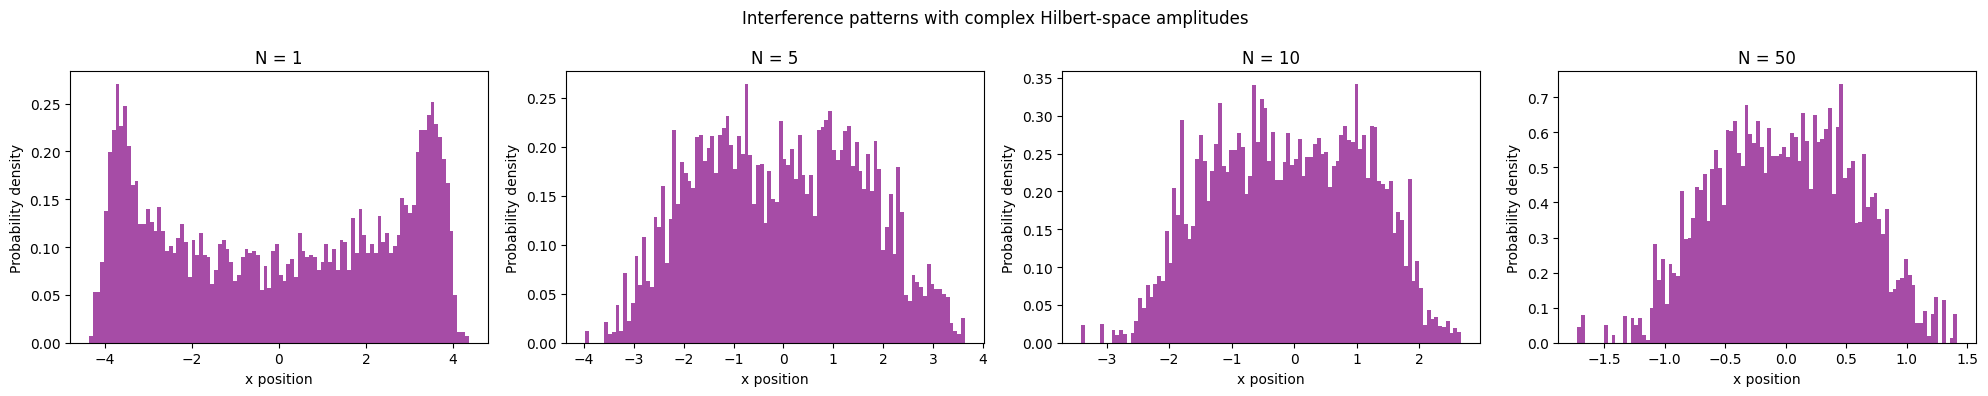

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# PARAMETERS
# -----------------------
num_particles = 5000
N_list = [1, 5, 10, 50]  # Hilbert-space dimensions to sweep
t_max = 5
dt = 0.05
x0 = 0.0
sigma_x = 0.1  # random diffusion
phase_factor = 0.5  # phase accumulation per step

# -----------------------
# HELPER FUNCTIONS
# -----------------------
def evolve_particles(N):
    x = np.zeros(num_particles) + x0
    hilbert = np.exp(1j * 2 * np.pi * np.random.rand(num_particles, N))  # complex initial amplitudes
    for t in np.arange(0, t_max, dt):
        # Diffusive motion + Hilbert-dependent drift
        drift = np.real(np.sum(hilbert, axis=1)) / N * dt
        x += drift + np.random.randn(num_particles) * sigma_x * np.sqrt(dt)
        hilbert *= np.exp(1j * phase_factor * dt)  # simple phase rotation
    return x, hilbert

def compute_measurement(hilbert):
    # Post-selection on first component
    return (np.real(hilbert[:, 0]) > 0).astype(int)

def compute_interference(x, hilbert):
    # Weight by |sum amplitudes|^2
    weights = np.abs(np.sum(hilbert, axis=1))**2
    hist, bins = np.histogram(x, bins=100, weights=weights, density=True)
    return hist, bins

# -----------------------
# MAIN SIMULATION
# -----------------------
fig, axs = plt.subplots(1, len(N_list), figsize=(5*len(N_list),4))

for idx, N in enumerate(N_list):
    x, hilbert = evolve_particles(N)
    measurement = compute_measurement(hilbert)
    hist, bins = compute_interference(x, hilbert)

    axs[idx].bar(bins[:-1], hist, width=bins[1]-bins[0], color='purple', alpha=0.7)
    axs[idx].set_title(f"N = {N}")
    axs[idx].set_xlabel("x position")
    axs[idx].set_ylabel("Probability density")

plt.suptitle("Interference patterns with complex Hilbert-space amplitudes")
plt.tight_layout()
plt.show()


 real interference fringes — we ’ll start seeing patterns that standard QM predicts and deviations for small
𝑁


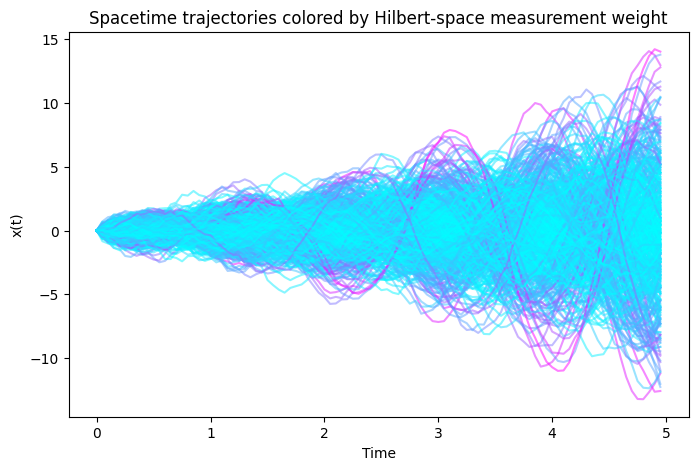

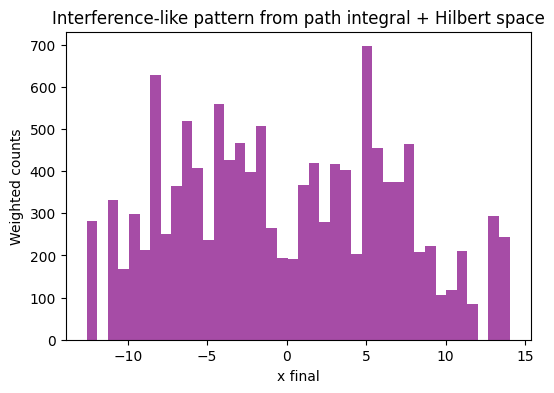

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 5.0             # total time
dt = 0.05           # time step
steps = int(T/dt)
N_particles = 500
N_hilbert = 5       # Hilbert-space dimension
m = 1.0
lambda_h = 0.1
kappa = 0.5
t_measure = int(3.5/dt)

# Initialize particles
x = np.zeros((N_particles, steps))
h = np.random.randn(N_particles, N_hilbert) + 1j*np.random.randn(N_particles, N_hilbert)
h_traj = np.zeros((N_particles, steps, N_hilbert), dtype=complex)
h_traj[:,0,:] = h

# Evolution loop (Euler discretization)
for t in range(1, steps):
    dx = np.random.randn(N_particles) * np.sqrt(dt)   # stochastic component
    dh = np.random.randn(N_particles, N_hilbert) * np.sqrt(dt) + 1j*np.random.randn(N_particles, N_hilbert)*np.sqrt(dt)

    # Coupling drift term
    drift = kappa * np.real(np.sum(h, axis=1))

    x[:, t] = x[:, t-1] + dx + drift*dt/m
    h = h + dh - kappa * x[:, t-1][:,None]*dt/lambda_h
    h_traj[:, t, :] = h

# Measurement projection at t_measure
phi = np.zeros(N_hilbert)
phi[0] = 1.0   # measuring first component
weights = np.abs(np.dot(h_traj[:, t_measure, :], phi))**2

# Plot trajectories colored by measurement weights
plt.figure(figsize=(8,5))
for i in range(N_particles):
    plt.plot(np.arange(steps)*dt, x[i,:], color=plt.cm.cool(weights[i]/weights.max()), alpha=0.5)
plt.xlabel("Time")
plt.ylabel("x(t)")
plt.title("Spacetime trajectories colored by Hilbert-space measurement weight")
plt.show()

# Interference pattern histogram at final time
plt.figure(figsize=(6,4))
plt.hist(x[:, -1], bins=40, weights=weights, color='purple', alpha=0.7)
plt.xlabel("x final")
plt.ylabel("Weighted counts")
plt.title("Interference-like pattern from path integral + Hilbert space")
plt.show()
